# Whatsapp Chat Analyzer (data analysis)

## problem defination 
> use different anlysis tool for chat exported files (.txt) to understand insights of the chat 

In [36]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/300.2 kB ? eta -:--:--
     ---                                   30.7/300.2 kB 640.0 kB/s eta 0:00:01
     --------                              71.7/300.2 kB 653.6 kB/s eta 0:00:01
     ------------                         102.4/300.2 kB 653.6 kB/s eta 0:00:01
     -------------------------              204.8/300.2 kB 1.0 MB/s eta 0:00:01
     -------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## important libraries

In [37]:
# import important libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data

There are two basic kinds of data in whatsapp
1. group chat
2. personal chat

In [5]:
# Define a function to parse the WhatsApp chat file and convert into pandas dataframe
def parse_whatsapp_chat(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()

    # Lists to store parsed data
    dates = []
    usernames = []
    messages = []

    # Parse each line
    for line in data:
        if ', ' in line and ' - ' in line:
            # Split the line into date and message
            date_part, message_part = line.split(' - ', 1)
            try:
                # Try to parse the date
                date = pd.to_datetime(date_part, format='%d/%m/%Y, %I:%M %p')
                dates.append(date)

                # Split the message part into username and message
                if ': ' in message_part:
                    username, message = message_part.split(': ', 1)
                    usernames.append(username.strip())
                    messages.append(message.strip())
                else:
                    # Handle messages without a username
                    usernames.append('Chat notification')
                    messages.append(message_part.strip())
            except ValueError:
                # If parsing fails, it's a continuation of the previous message
                if messages:
                    messages[-1] += ' ' + line.strip()
                else:
                    continue

    # Create a DataFrame
    df = pd.DataFrame({'Date': dates, 'User': usernames, 'Message': messages})
    return df

## PC(personal chat) 

In [6]:
# Parse the WhatsApp chat file
file_path = 'data/personal chat.txt'
pc = parse_whatsapp_chat(file_path)

# Display the first few rows of the DataFrame
pc.head()


,Date,User,Message
0,2024-04-16 09:55:00,Chat notification,Messages and calls are end-to-end encrypted. N...
1,2024-04-16 09:55:00,Aamir Jamil,<Media omitted>
2,2024-04-16 19:30:00,Aamir Jamil,null
3,2024-04-16 19:41:00,Aamir Jamil,null
4,2024-04-17 20:01:00,Aamir Jamil,null


## GC(group chat)

In [7]:
# Parse the WhatsApp chat file
file_path = 'data/group chat.txt'
gc = parse_whatsapp_chat(file_path)

# Display the first few rows of the DataFrame
gc.head()


,Date,User,Message
0,2024-02-17 17:49:00,Chat notification,Messages and calls are end-to-end encrypted. N...
1,2024-01-07 20:48:00,Chat notification,"~ Naeem Aslam created group ""‎‫❤شاعرانہ ماحول ..."
2,2024-02-17 17:37:00,Chat notification,~ A 🥰 added you
3,2024-02-17 17:37:00,Chat notification,~ A 🥰 added +92 302 5656168
4,2024-02-17 17:38:00,Chat notification,~ A 🥰 added +92 307 5659556


## Data analysis 
> select chat and chat title here

In [101]:
# make a copy of personal chat as df 
df = gc
name = input("enter the name of the chat: ")

enter the name of the chat: poetry group


In [102]:
df.Date.dt.year

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
433    2024
434    2024
435    2024
436    2024
437    2024
Name: Date, Length: 438, dtype: int64

In [103]:
# extra required data from date columns and 
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name()
df['Day'] = df.Date.dt.day
df['Hour'] = df.Date.dt.hour
df['minute'] = df.Date.dt.minute

In [104]:
df.head()

,Date,User,Message,Year,Month,Day,Hour,minute,Word Count,Link Count,Media Count,YearMonth
0,2024-02-17 17:49:00,Chat notification,Messages and calls are end-to-end encrypted. N...,2024,February,17,17,49,25,0,0,2024-02
1,2024-01-07 20:48:00,Chat notification,"~ Naeem Aslam created group ""‎‫❤شاعرانہ ماحول ...",2024,January,7,20,48,8,0,0,2024-01
2,2024-02-17 17:37:00,Chat notification,~ A 🥰 added you,2024,February,17,17,37,5,0,0,2024-02
3,2024-02-17 17:37:00,Chat notification,~ A 🥰 added +92 302 5656168,2024,February,17,17,37,7,0,0,2024-02
4,2024-02-17 17:38:00,Chat notification,~ A 🥰 added +92 307 5659556,2024,February,17,17,38,7,0,0,2024-02


In [105]:
# Count total words in the Message column
df['Word Count'] = df['Message'].apply(lambda x: len(x.split()))
total_word_count = df['Word Count'].sum()
print(f"Total word count in the Message column: {total_word_count}")


Total word count in the Message column: 3547


In [106]:
# Count the number of links in the Message column
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['Link Count'] = df['Message'].apply(lambda x: len(url_pattern.findall(x)))
total_link_count = df['Link Count'].sum()
print(f"Total number of links in the Message column: {total_link_count}")


Total number of links in the Message column: 3


In [107]:
# Count the number of media files in the Message column
media_pattern = re.compile(r'<Media omitted>')  # This pattern can be adjusted based on your chat export format
df['Media Count'] = df['Message'].apply(lambda x: len(media_pattern.findall(x)))
total_media_count = df['Media Count'].sum()
print(f"Total number of media files in the Message column: {total_media_count}")


Total number of media files in the Message column: 7


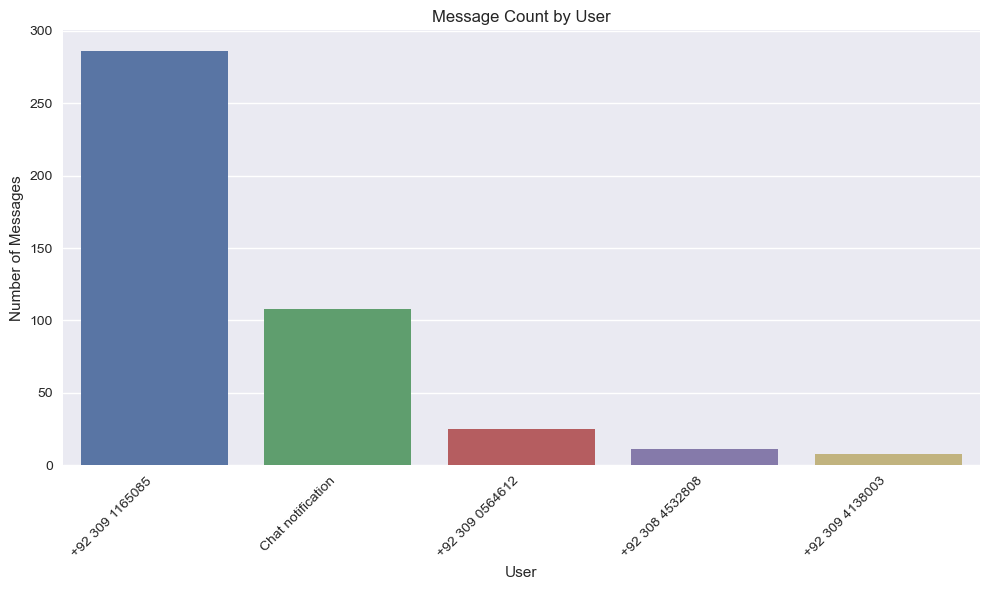

In [108]:
plt.figure(figsize=(10, 6))
user_message_counts = df['User'].value_counts()
sns.barplot(x=user_message_counts.index, y=user_message_counts.values)
plt.title('Message Count by User')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Save the figure
filename = f'images/{name} Message Count by User.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()


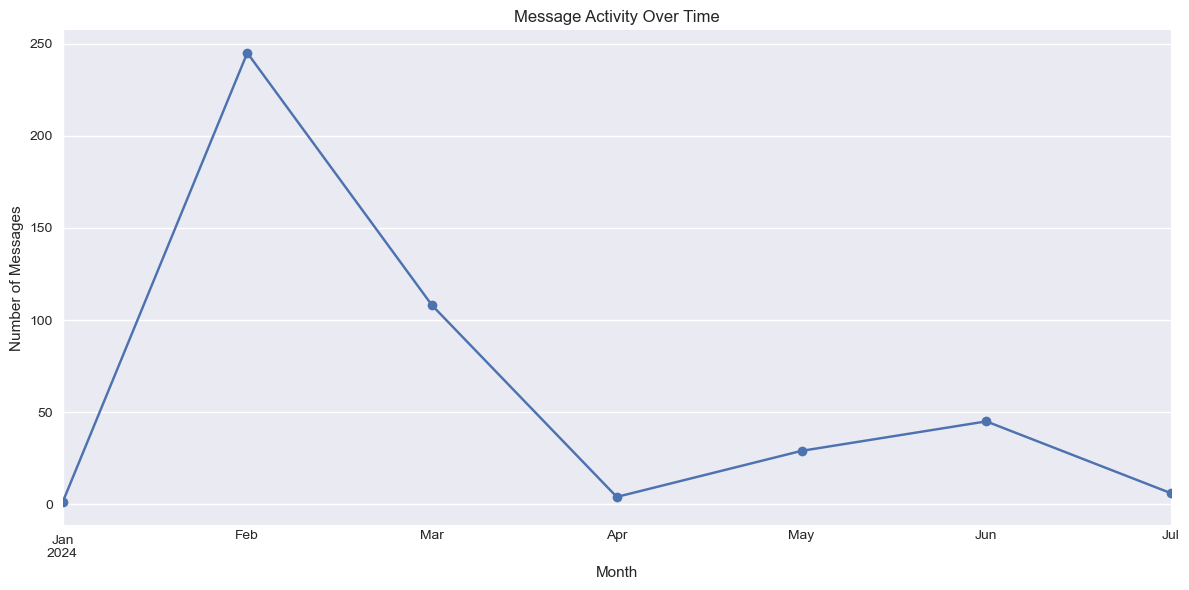

In [109]:
plt.figure(figsize=(12, 6))
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_counts = df.groupby('YearMonth').size()
monthly_counts.plot(kind='line', marker='o')
plt.title('Message Activity Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.tight_layout()



# Save the figure
filename = f'images/{name} Message Activity over time.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()


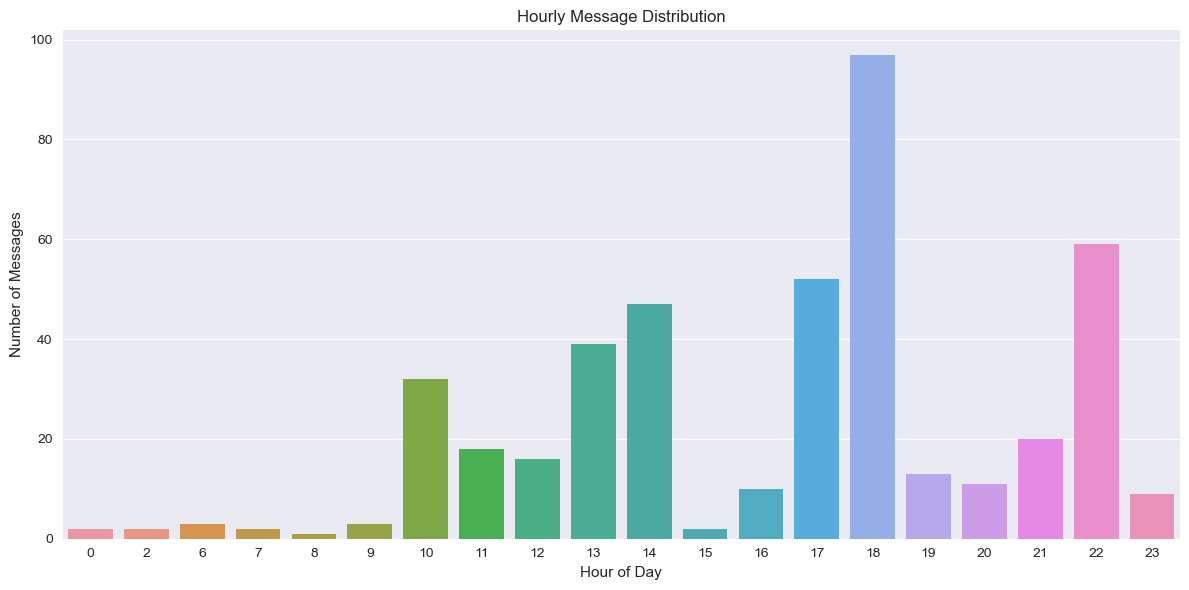

In [110]:
plt.figure(figsize=(12, 6))
hourly_counts = df['Hour'].value_counts().sort_index()
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Message Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.tight_layout()

# Save the figure
filename = f'images/{name} Message Hourly Message Distribution.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

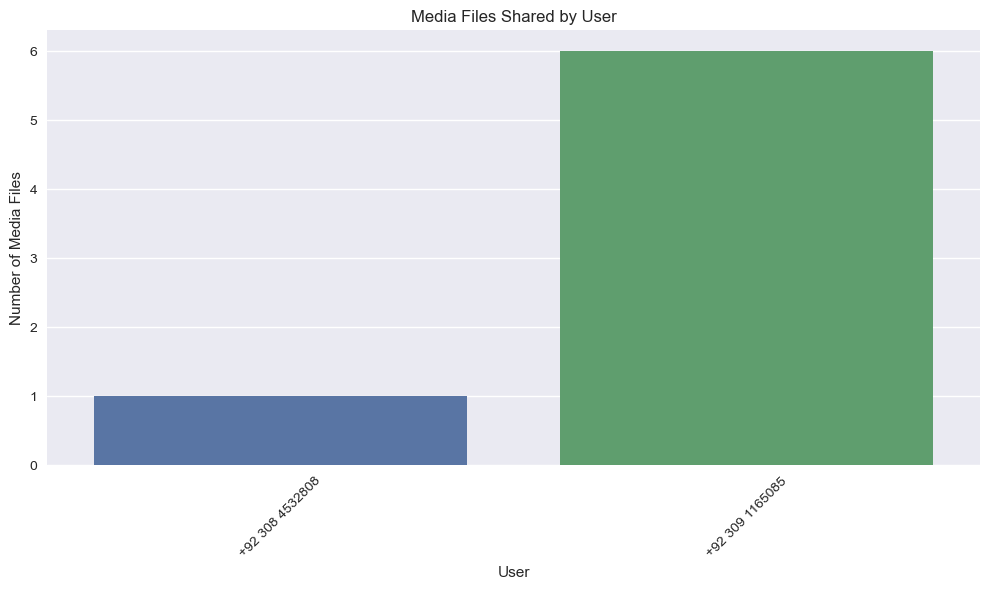

In [111]:
plt.figure(figsize=(10, 6))
media_by_user = df[df['Media Count'] > 0].groupby('User')['Media Count'].sum()
sns.barplot(x=media_by_user.index, y=media_by_user.values)
plt.title('Media Files Shared by User')
plt.xlabel('User')
plt.ylabel('Number of Media Files')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
filename = f'images/{name} Number of Media Files.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

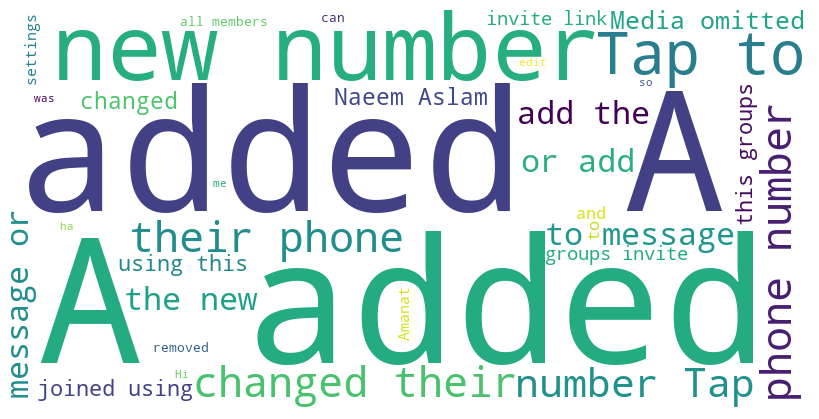

In [112]:
def preprocess_text(text):
    # Remove URLs, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=set(), min_font_size=10).generate(text)
    
    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    
    # Save the image
    
    plt.savefig(f'images/{name} wordcloud.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Preprocess the messages
words = df['Message'].apply(preprocess_text)

# Combine all messages into a single string
all_words = ' '.join(words)

# Generate the word cloud
generate_wordcloud(all_words)

# The rest of your code remains the same
# ...

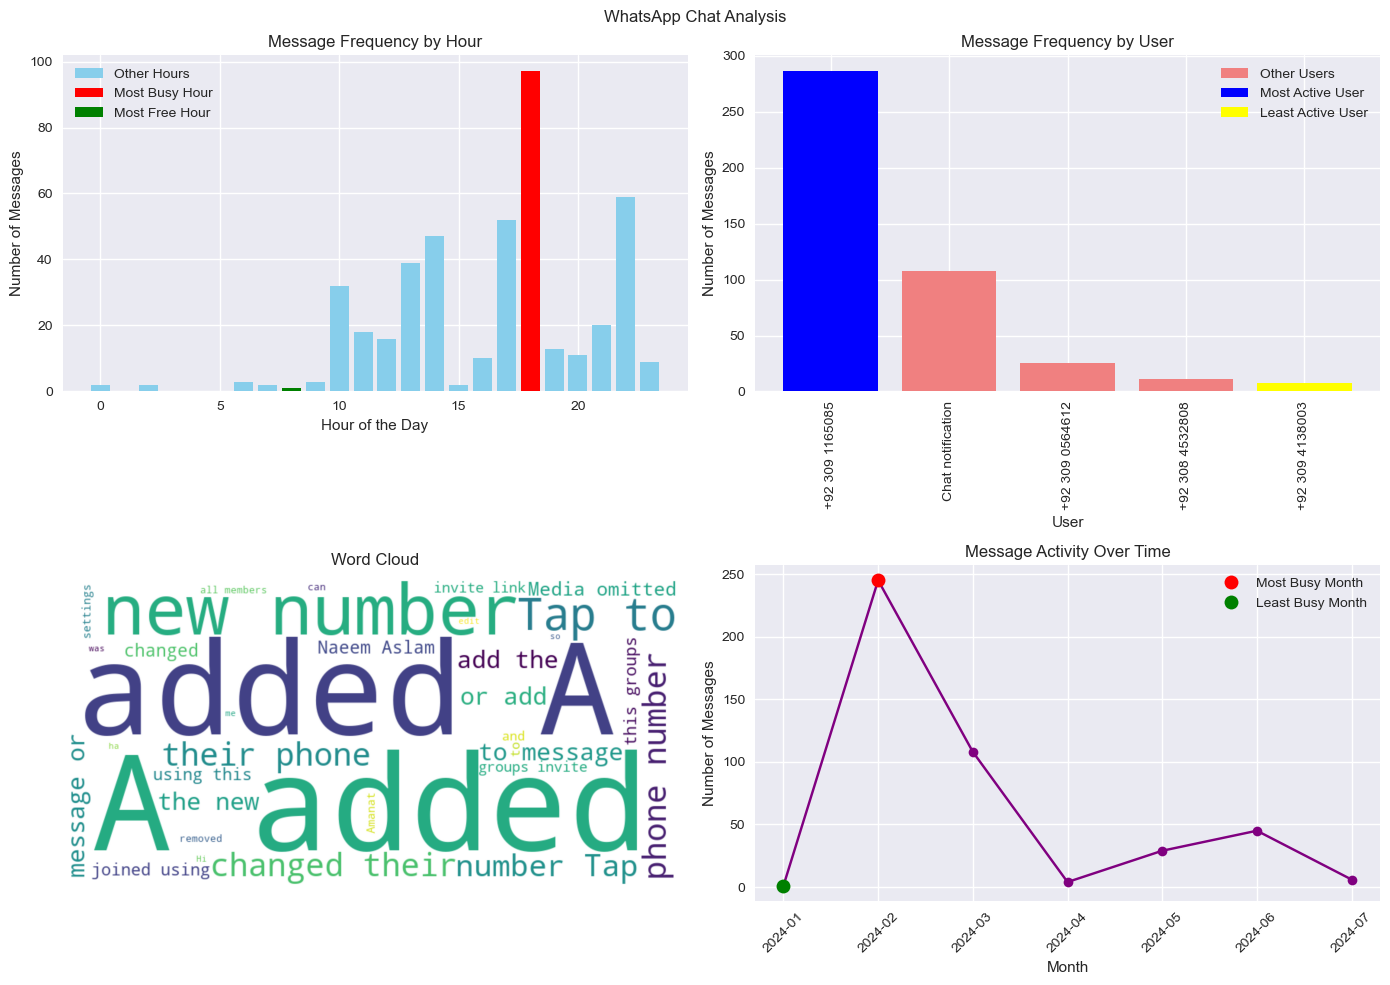

Most busy hour: 18
Most free hour: 8
Most active user: +92 309 1165085
Least active user: +92 309 4138003
Most busy month: 2024-02
Least busy month: 2024-01


In [113]:
# Most busy and free hours
hourly_counts = df['Hour'].value_counts().sort_index()
most_busy_hour = hourly_counts.idxmax()
most_free_hour = hourly_counts.idxmin()

# Most active and least active users
user_counts = df['User'].value_counts()
most_active_user = user_counts.idxmax()
least_active_user = user_counts.idxmin()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot most busy and free hours
axes[0, 0].bar(hourly_counts.index, hourly_counts.values, color='skyblue')
axes[0, 0].set_title('Message Frequency by Hour')
axes[0, 0].set_xlabel('Hour of the Day')
axes[0, 0].set_ylabel('Number of Messages')
# Highlight most busy and free hours
axes[0, 0].bar(most_busy_hour, hourly_counts[most_busy_hour], color='red')
axes[0, 0].bar(most_free_hour, hourly_counts[most_free_hour], color='green')
axes[0, 0].legend(['Other Hours', 'Most Busy Hour', 'Most Free Hour'])

# Plot most active and least active users
user_counts_sorted = user_counts.sort_values(ascending=False)
axes[0, 1].bar(user_counts_sorted.index, user_counts_sorted.values, color='lightcoral')
axes[0, 1].set_title('Message Frequency by User')
axes[0, 1].set_xlabel('User')
axes[0, 1].set_ylabel('Number of Messages')
axes[0, 1].tick_params(axis='x', rotation=90)
# Highlight most active and least active users
axes[0, 1].bar(most_active_user, user_counts[most_active_user], color='blue')
axes[0, 1].bar(least_active_user, user_counts[least_active_user], color='yellow')
axes[0, 1].legend(['Other Users', 'Most Active User', 'Least Active User'])

# Display word cloud image
wordcloud_img = mpimg.imread(f'images/{name} wordcloud.png')
axes[1, 0].imshow(wordcloud_img)
axes[1, 0].axis('off')  # This removes the axes and any surrounding elements
axes[1, 0].set_xlabel('Word Font ~ Frequency')
axes[1, 0].set_title('Word Cloud')

# Plot message activity over time and highlight most busy and least busy months
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_counts = df.groupby('YearMonth').size()
most_busy_month = monthly_counts.idxmax()
least_busy_month = monthly_counts.idxmin()

axes[1, 1].plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', color='purple')
axes[1, 1].set_title('Message Activity Over Time')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Messages')
axes[1, 1].tick_params(axis='x', rotation=45)

# Highlight most busy and least busy months
axes[1, 1].plot(most_busy_month.strftime('%Y-%m'), monthly_counts[most_busy_month], 'ro', markersize=10, label='Most Busy Month')
axes[1, 1].plot(least_busy_month.strftime('%Y-%m'), monthly_counts[least_busy_month], 'go', markersize=10, label='Least Busy Month')
axes[1, 1].legend()


# Add titles and adjust layout
fig.suptitle('WhatsApp Chat Analysis')
plt.tight_layout()

# Save the figure
filename = f'images/{name} Final Analysis.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# show plot
plt.show()

# Print out the results
print(f"Most busy hour: {most_busy_hour}")
print(f"Most free hour: {most_free_hour}")
print(f"Most active user: {most_active_user}")
print(f"Least active user: {least_active_user}")
print(f"Most busy month: {most_busy_month.strftime('%Y-%m')}")
print(f"Least busy month: {least_busy_month.strftime('%Y-%m')}")